# Exploratory Data Analysis (EDA)

This exploratory data analysis investigates user behavior in the Waze app with the goal of identifying factors that contribute to user churn.

## Python Libraries

**pandas** – For data loading, cleaning, and transformation \
**numpy** – For numerical operations \
**seaborn & matplotlib** – For visualizing trends and variable distributions

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [13]:
# load dataset
df = pd.read_csv(r'C:\Users\mqtth\Desktop\Projects\Waze_Churn_ML_Project\data\waze_dataset.csv')

In [14]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [15]:
df.info

<bound method DataFrame.info of           ID     label  sessions  drives  total_sessions  \
0          0  retained       283     226      296.748273   
1          1  retained       133     107      326.896596   
2          2  retained       114      95      135.522926   
3          3  retained        49      40       67.589221   
4          4  retained        84      68      168.247020   
...      ...       ...       ...     ...             ...   
14994  14994  retained        60      55      207.875622   
14995  14995  retained        42      35      187.670313   
14996  14996  retained       273     219      422.017241   
14997  14997   churned       149     120      180.524184   
14998  14998  retained        73      58      353.419797   

       n_days_after_onboarding  total_navigations_fav1  \
0                         2276                     208   
1                         1225                      19   
2                         2651                       0   
3              

## Examining Spread and Distribution of values

In [29]:
# helper function to plot histograms
def histogrammer(column_str, median_text=True, **kwargs):

    median=round(df[column_str].median(), 1)
    
    plt.figure(figsize=(10,6))
    ax = sns.histplot(
        x= df[column_str],
        color='#33CCFF',
        **kwargs)
    
    # plot median line
    plt.axvline(median, color='red', linestyle='--')
    if median_text==True:
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram');
    
# helper function to plot boxplots
def boxplotter(column_str, median_text=True, **kwargs):
    
    plt.figure(figsize=(10,2))
    ax = sns.boxplot(
        x= df[column_str],
        color='#33CCFF',
        **kwargs)
    plt.title(f'{column_str} boxplot');
   

**`sessions`**: The number of occurrence of a user opening the app during the month

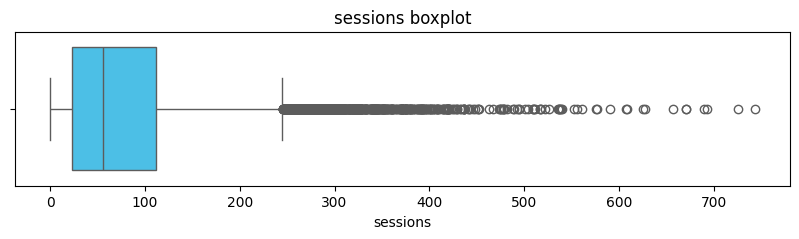

In [30]:
boxplotter('sessions')

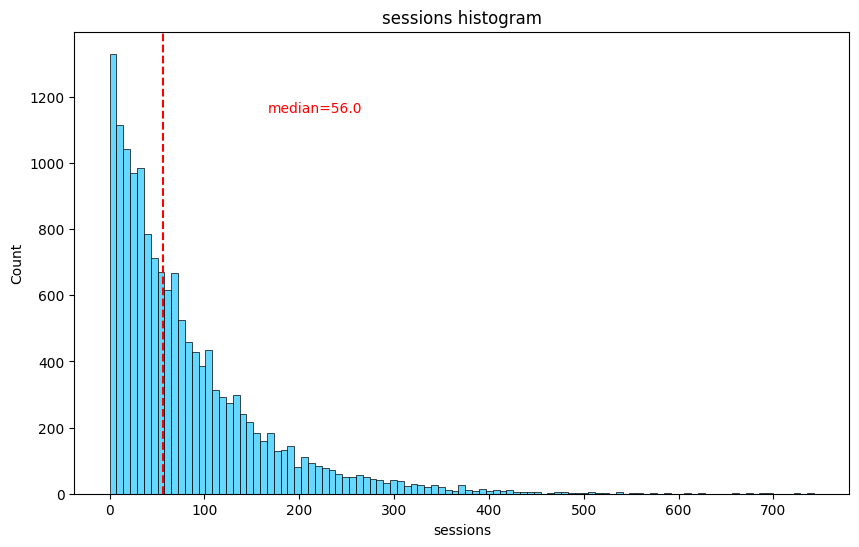

In [32]:
histogrammer('sessions')

The `sessions` variable follows a right-skewed distribution with half of the observations having 56 or fewer sessions. Some users have upwards of 500 sessions recorded. 

**`drives`**: An occurance of driving at least 1 km during the month. 

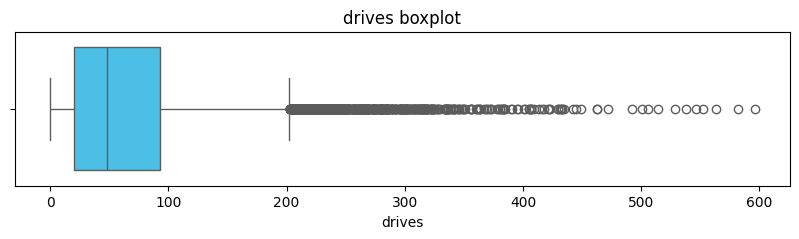

In [33]:
boxplotter('drives')

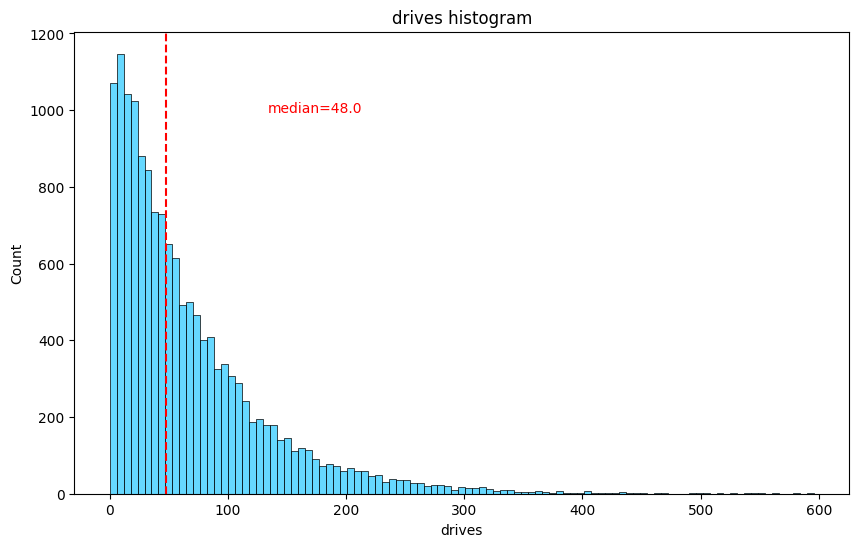

In [34]:
histogrammer('drives')

The `drives` variable is similar to `sessions` and follows a right-skewed distribution. It is approximately log normal with a median of 48. 

`total_sessions`: a model estimate of the total number of sessions since a user has onboarded

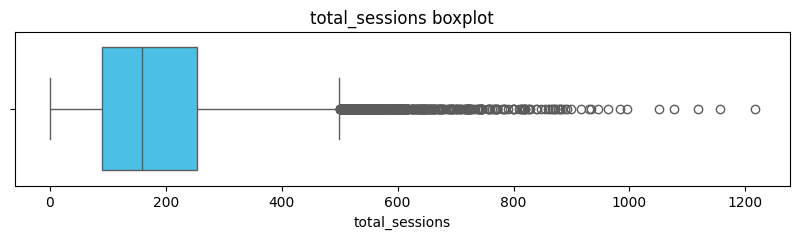

In [35]:
boxplotter('total_sessions')

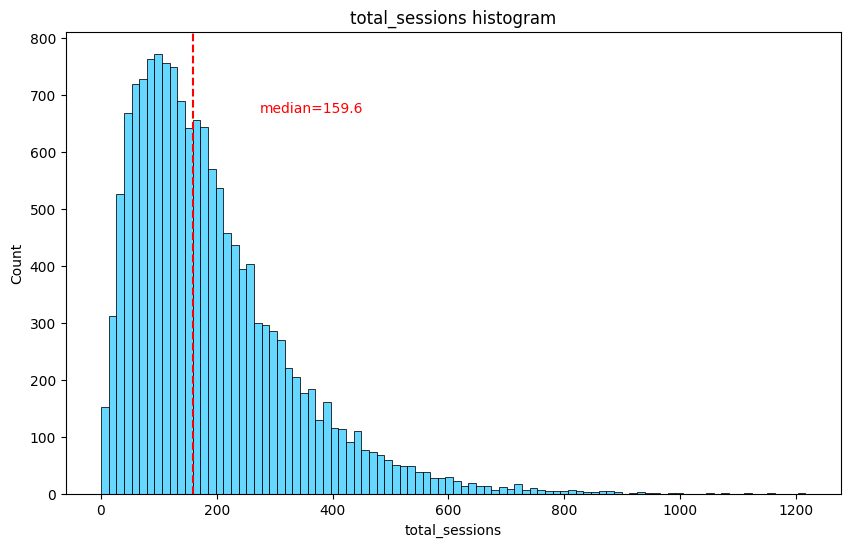

In [36]:
histogrammer('total_sessions')

`total_sessions` follows a right-skewed distribution. The median total sessions per user is 159.6. Given that the median number of sessions in the past month was 56, it seems that around a third of the user's total drives might have taken place in the last month. 

`n_days_after_onboarding`: The number of days since a user signed up for the app

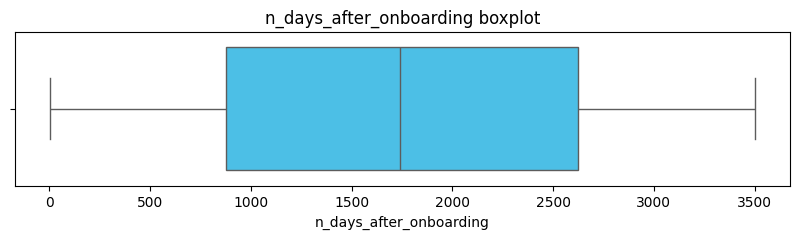

In [37]:
boxplotter('n_days_after_onboarding')

Median: 1741.0


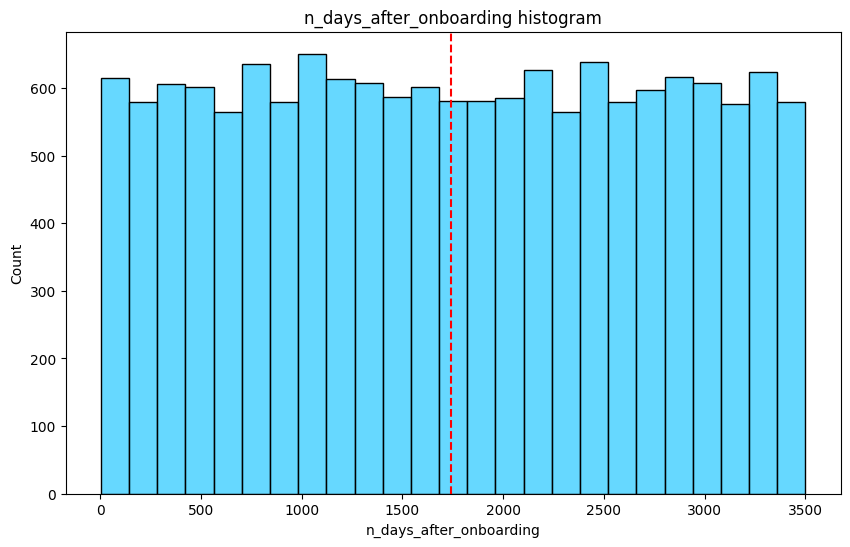

In [39]:
histogrammer('n_days_after_onboarding', median_text=False)

`n_days_after_onboarding` follows a uniform distribution with values ranging from about 0-3500. (0-9.5 years)

`driven_km_drives`: Total kilometers driven during the month

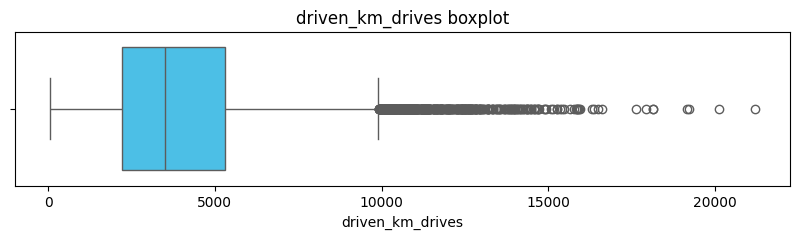

In [40]:
boxplotter('driven_km_drives')

Median: 3493.9


<Figure size 1000x1600 with 0 Axes>

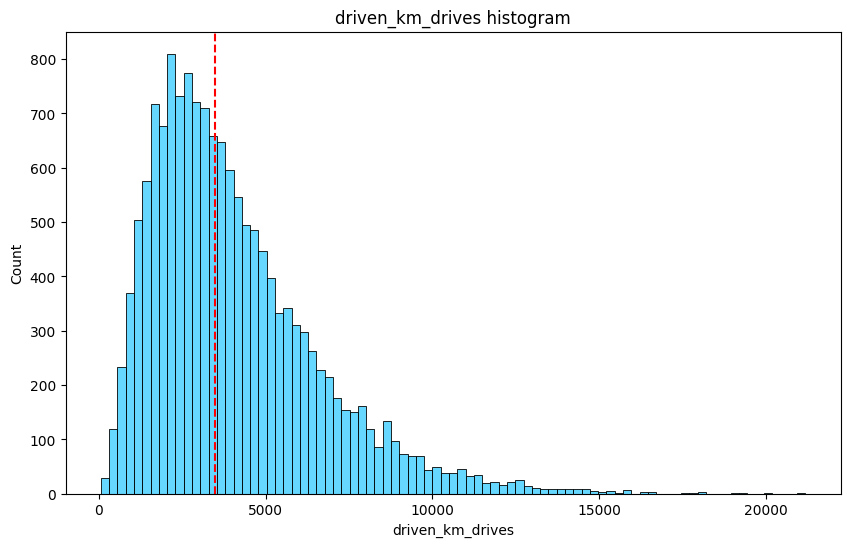

In [ ]:
histogrammer('driven_km_drives')

`driven_km_drives` follows a right-skewed distribution with a median of 3494 or 2171 miles, for my American friends. The median is about the distance from Los Angeles to Atlanta. 

`activity_days`: Number of days the user opens the app during the month

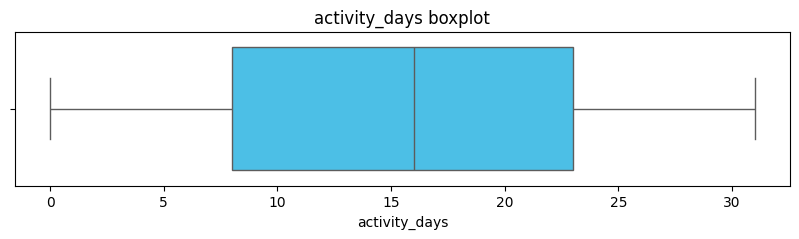

In [52]:
boxplotter('activity_days')

Median: 16.0


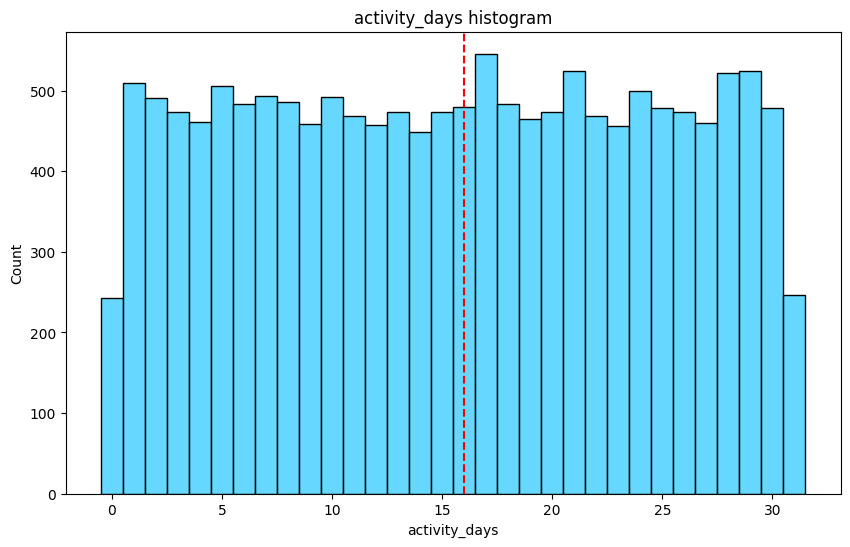

In [55]:
histogrammer('activity_days', median_text=False, discrete=True)

The histogram for `activity_days` follows a centered and fairly uniform distribution. For each count of days, there is approximately 500 people opening the app. We find that around 250 people did not open the app at all and 250 opened the app every day of the month. 

`driving_days`: The number of days the user drives at least 1 km during the month

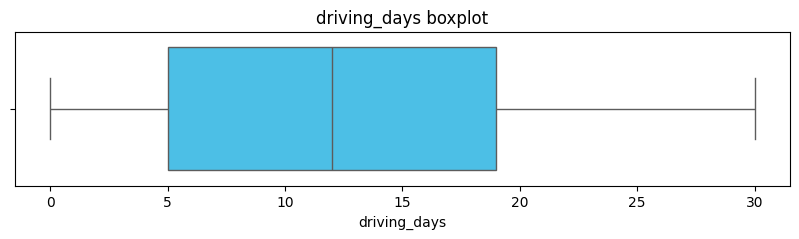

In [47]:
boxplotter('driving_days')

Median: 12.0


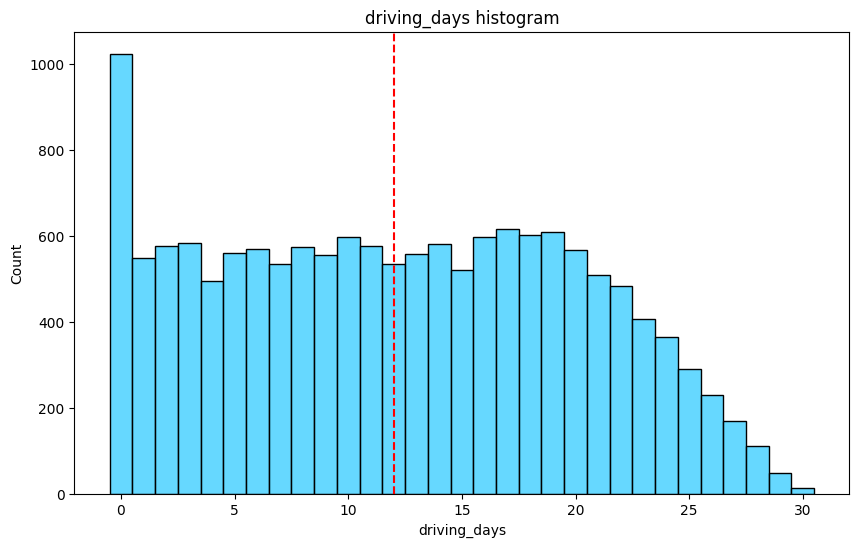

In [51]:
histogrammer('driving_days', median_text=False, discrete=True)

The number of days users drove each month appears to be roughly uniform other than the high 0 count. This is somewhat unexpected when compared to `activity_days`, where around 500 users were recorded across most day counts. We might flag this observation for future analysis. 

Comparing `driving_days` and `activity_days` might help us understand how they relate to each other given that they are closely related. 

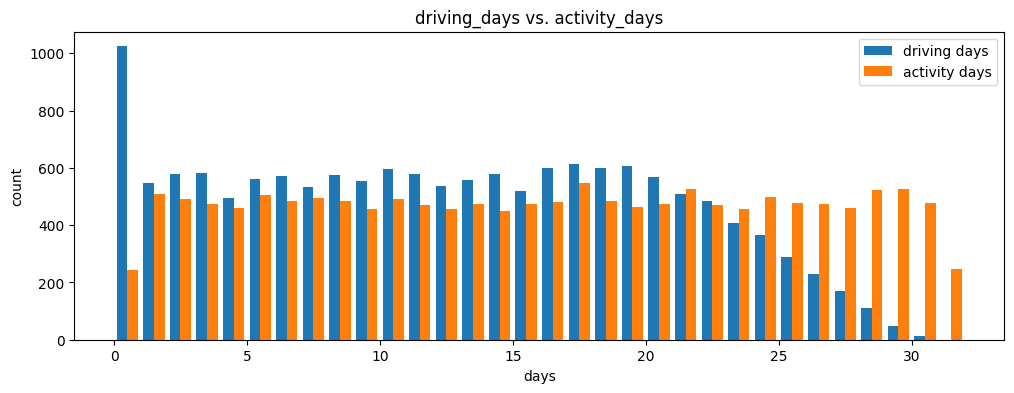

In [ ]:
plt.figure(figsize=(12, 4))
label = ['driving days', 'activity days']

plt.hist([df['driving_days'], df['activity_days']],
         bins= range(0, 33),
         label=label,)     

plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days')

The results from the above histogram might seem counterintuitive. At first glance, it doesn't make much sense that there were fewer users who didn't open the app at all, yet more who didn't drive during the month?

One possible explanation is that while `driving_days` and `activity_days` are related, they capture different types of engagement. Users might of opened the app for reasons other than driving, or even on accident so it is not suprising that the app activity is more frequent than driving. 

That said, it might be worthwile to reach out to the Waza data team to understand how they calculate these monthly metrics. 

#### Renention by device:

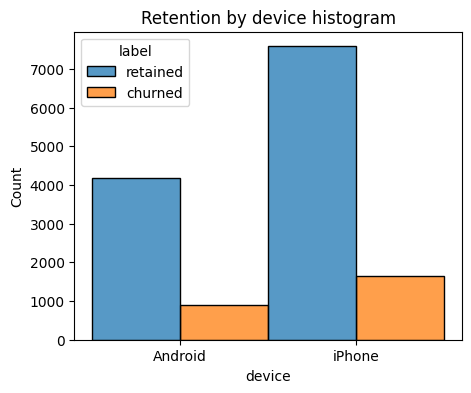

In [ ]:
plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge',
             )
plt.title('Retention by device histogram')

The retention rate between the devices seem consistent. 

#### Retention in relation to km driven per day

In [61]:
# create new column
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

df['km_per_driving_day'].describe()

C:\Users\mqtth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

The mean is infinity, which obviously does not make sense. This is because of there being zeros in the driving_days column. Pandas imputes a value of infinity because division by zero is undefined. We will convert all of these rows to 0.

In [62]:
df.loc[df['km_per_driving_day'] == np.inf, 'km_per_driving_day'] = 0

df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

In our histogram, we will filter unrealistic values, specifically users who averaged more than 12,000 km per driving day as such distances are highly unlikely.

Text(0, 0.5, 'Percentage Churn Rate')

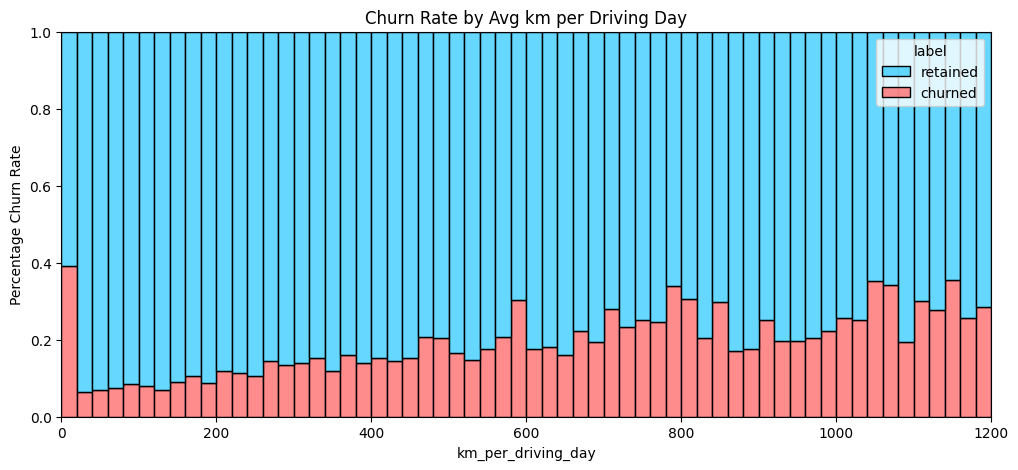

In [70]:
filtered_df = df[df['km_per_driving_day'] < 1200]

plt.figure(figsize=(12, 5))
sns.histplot(
    data=filtered_df,
    x='km_per_driving_day',
    bins=range(0, 1201, 20),
    hue='label',
    multiple='fill',
    palette=['#33CCFF', '#FF6666']
)

plt.title('Churn Rate by Avg km per Driving Day')
plt.ylabel('Percentage Churn Rate')

The churn rate increases with higher mean daily driving distances. This may suggest that long-distance users may have different needs or expectations from the Waze app. Exploring these specific correlations could help in the process of improving retention. 

#### Churn rate per number of driving days

Text(0, 0.5, 'Percentage Churn Rate')

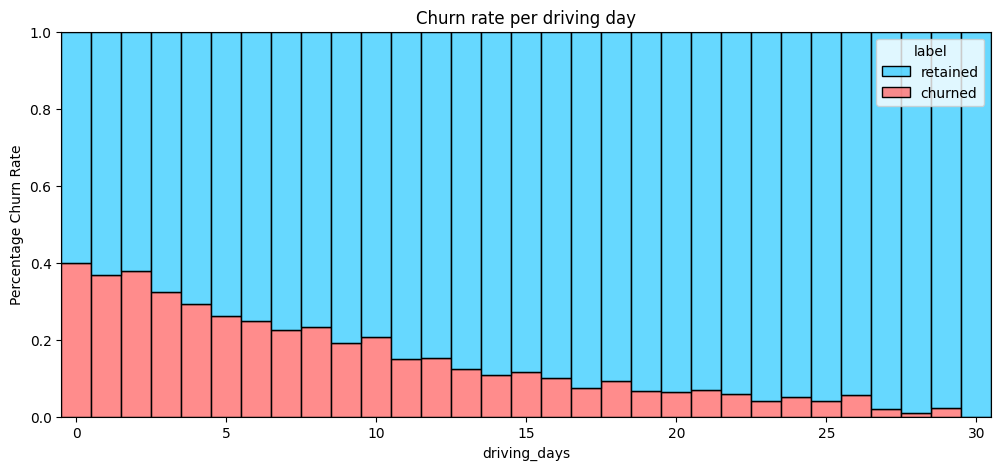

In [71]:
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='driving_days',
             bins=range(1,32),
             hue='label',
             multiple='fill',
             discrete=True,
             palette=['#33CCFF', '#FF6666']
)

plt.title('Churn rate per driving day')
plt.ylabel('Percentage Churn Rate')

### Handling Outliers

Due to most of the distributions of the variables to be right-skewed, we will need to deal with the outliers. 

In [73]:
def outlier_imputer(column_name, percentile):
    # calculate the threshold for the given percentile
    threshold = df[column_name].quantile(percentile)
    
    # impute threshold for values greater than the threshold
    df.loc[df[column_name] > threshold, column_name] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

In [74]:
for column in ['sessions', 'drives', 'total_sessions',
               'driven_km_drives', 'duration_minutes_drives']:
               outlier_imputer(column, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.3632037399997
         driven_km_drives | percentile: 0.95 | threshold: 8889.7942356
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.899348999998


In [75]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,578.963113
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,1030.094384
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110
